# Author: Kumar R.

# Transfer Lerning

Using Transfer Learning method to classify the Human vs Horse. I will be using the below algoarith to classify.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Refer https://docs.python.org/3/library/glob.html for GLOB

import tensorflow as tf
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob


# re-size all the images to this
IMAGE_SIZE = [100, 100] 

# training config:
epochs = 5
batch_size = 32



# https://www.kaggle.com/moltean/fruits
train_path = '/content/drive/MyDrive/Colab Notebooks/AssignmentDataset/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/AssignmentDataset/Validation'


# useful for getting number of files
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

# useful for getting number of classes
folders = glob(train_path + '/*')



# VGG16

In [4]:
# create an instance of ImageDataGenerator
gen = tf.keras.preprocessing.image.ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)

train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [5]:
#VGG16 Example

#include_top = True ----> You are going to use the entire pre-trained model which is trained in Imgnet.
#include_top = False

vgg = tf.keras.applications.vgg16.VGG16(input_shape=[100,100,3] ,
                                       weights="imagenet",
                                       include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [6]:
#Dont train existing weights  -- Locking the pretrained weights
for layer in vgg.layers:
    layer.trainable = False

In [7]:
#Adding our layers -- Fully Connected
flatten = tf.keras.layers.Flatten()
#...
finalLayer = tf.keras.layers.Dense(2, activation="softmax")

model = tf.keras.models.Sequential([
    vgg,  #vgg without fully connected network
    flatten, #Adding Flattening
    finalLayer #Adding Output Layer
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 9218      
Total params: 14,723,906
Trainable params: 9,218
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
#Compile
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [10]:
#Fit
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=15,
                    steps_per_epoch= len(train_generator.filenames) // batch_size,
                    validation_steps= len(valid_generator.filenames) // batch_size,
                    use_multiprocessing=False)

Epoch 1/15
32/32 [==============================] - 458s 13s/step - loss: 0.9708 - accuracy: 0.9337 - val_loss: 0.5623 - val_accuracy: 0.9531
Epoch 2/15
32/32 [==============================] - 11s 333ms/step - loss: 0.1591 - accuracy: 0.9879 - val_loss: 0.3189 - val_accuracy: 0.9727
Epoch 3/15
32/32 [==============================] - 11s 338ms/step - loss: 0.2079 - accuracy: 0.9849 - val_loss: 0.2767 - val_accuracy: 0.9844
Epoch 4/15
32/32 [==============================] - 11s 334ms/step - loss: 0.1403 - accuracy: 0.9920 - val_loss: 0.1865 - val_accuracy: 0.9883
Epoch 5/15
32/32 [==============================] - 11s 335ms/step - loss: 0.0917 - accuracy: 0.9940 - val_loss: 0.2917 - val_accuracy: 0.9609
Epoch 6/15
32/32 [==============================] - 11s 344ms/step - loss: 0.0801 - accuracy: 0.9950 - val_loss: 0.3689 - val_accuracy: 0.9844
Epoch 7/15
32/32 [==============================] - 11s 338ms/step - loss: 0.0792 - accuracy: 0.9950 - val_loss: 0.4296 - val_accuracy: 0.9414


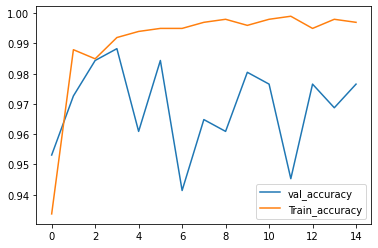

In [12]:
#Visualization of the performace
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val_accuracy','Train_accuracy'])

# Inception v3

In [13]:
gen = tf.keras.preprocessing.image.ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=tf.keras.applications.inception_v3.preprocess_input
)

train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [14]:

# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3
# load model
inception = InceptionV3(input_shape=[100,100,3] ,weights="imagenet",include_top=False)

#Dont train existing weights
for layer in inception.layers:
    layer.trainable = False
    
#Adding our layers -- Fully Connected
flatten = tf.keras.layers.Flatten()
#...
finalLayer = tf.keras.layers.Dense(2, activation="softmax")

model = tf.keras.models.Sequential([inception,
                                    flatten,
                                    finalLayer])
     

87924736/87910968 [==============================] - 1s 0us/step


In [15]:
#Compile
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [16]:
#Fit
history = model.fit(train_generator,
                    validation_data=valid_generator,
                   epochs=25,
                   steps_per_epoch= len(train_generator.filenames) // batch_size,
                   validation_steps= len(valid_generator.filenames) // batch_size,
                   use_multiprocessing=False)

Epoch 1/25
32/32 [==============================] - 16s 373ms/step - loss: 0.5060 - accuracy: 0.8141 - val_loss: 0.4000 - val_accuracy: 0.8398
Epoch 2/25
32/32 [==============================] - 11s 331ms/step - loss: 0.2873 - accuracy: 0.9055 - val_loss: 0.3375 - val_accuracy: 0.8711
Epoch 3/25
32/32 [==============================] - 11s 330ms/step - loss: 0.2199 - accuracy: 0.9196 - val_loss: 0.3214 - val_accuracy: 0.8633
Epoch 4/25
32/32 [==============================] - 11s 332ms/step - loss: 0.1670 - accuracy: 0.9437 - val_loss: 0.3066 - val_accuracy: 0.8633
Epoch 5/25
32/32 [==============================] - 11s 330ms/step - loss: 0.1624 - accuracy: 0.9437 - val_loss: 0.2589 - val_accuracy: 0.9062
Epoch 6/25
32/32 [==============================] - 11s 331ms/step - loss: 0.1642 - accuracy: 0.9407 - val_loss: 0.2005 - val_accuracy: 0.9023
Epoch 7/25
32/32 [==============================] - 11s 336ms/step - loss: 0.1335 - accuracy: 0.9598 - val_loss: 0.3087 - val_accuracy: 0.8789

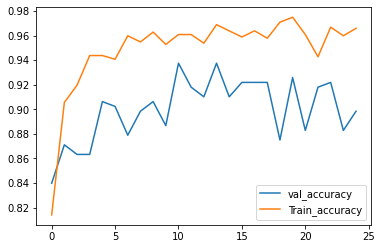

In [17]:
#Visualization of the performace
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val_accuracy','Train_accuracy'])

# Resnet 50

In [18]:
gen = tf.keras.preprocessing.image.ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=tf.keras.applications.resnet50.preprocess_input
)

train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [19]:

# example of loading the inception v3 model
from keras.applications.resnet50 import ResNet50
# load model
resnet = ResNet50(input_shape=[100,100,3] ,weights="imagenet",include_top=False)

#Dont train existing weights
for layer in resnet.layers:
    layer.trainable = False
    
#Adding our layers -- Fully Connected
flatten = tf.keras.layers.Flatten()
#...
finalLayer = tf.keras.layers.Dense(2, activation="softmax")

model = tf.keras.models.Sequential([
    resnet,
    flatten,
    finalLayer
])

model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 65538     
Total params: 23,653,250
Trainable params: 65,538
Non-trainable params: 23,587,712
_________________________________________________________________


In [22]:
#Compile
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [23]:
#Fit
history = model.fit(train_generator,
                    validation_data=valid_generator,
                   epochs=25,
                   steps_per_epoch= len(train_generator.filenames) // batch_size,
                   validation_steps= len(valid_generator.filenames) // batch_size,
                   use_multiprocessing=False)

Epoch 1/25
32/32 [==============================] - 14s 354ms/step - loss: 0.8839 - accuracy: 0.9256 - val_loss: 0.1200 - val_accuracy: 0.9805
Epoch 2/25
32/32 [==============================] - 10s 328ms/step - loss: 0.0649 - accuracy: 0.9889 - val_loss: 0.1766 - val_accuracy: 0.9648
Epoch 3/25
32/32 [==============================] - 11s 329ms/step - loss: 0.0849 - accuracy: 0.9910 - val_loss: 0.0776 - val_accuracy: 0.9844
Epoch 4/25
32/32 [==============================] - 10s 326ms/step - loss: 0.0479 - accuracy: 0.9940 - val_loss: 0.1268 - val_accuracy: 0.9805
Epoch 5/25
32/32 [==============================] - 11s 330ms/step - loss: 0.0524 - accuracy: 0.9940 - val_loss: 0.1737 - val_accuracy: 0.9688
Epoch 6/25
32/32 [==============================] - 10s 327ms/step - loss: 0.0600 - accuracy: 0.9910 - val_loss: 0.1021 - val_accuracy: 0.9844
Epoch 7/25
32/32 [==============================] - 11s 329ms/step - loss: 0.0140 - accuracy: 0.9990 - val_loss: 0.2036 - val_accuracy: 0.9648

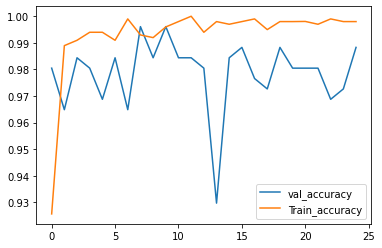

In [24]:
#Visualization of the performace
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val_accuracy','Train_accuracy'])

# Xception

In [25]:
gen = tf.keras.preprocessing.image.ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=tf.keras.applications.xception.preprocess_input
)

train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [26]:
# example of loading the inception v3 model
from keras.applications.xception import Xception
# load model
xception = Xception(input_shape=[100,100,3], weights="imagenet",include_top=False)

#Dont train existing weights
for layer in inception.layers:
    layer.trainable = False
    
#Adding our layers -- Fully Connected
flatten = tf.keras.layers.Flatten()
#...
finalLayer = tf.keras.layers.Dense(2, activation="softmax")

model = tf.keras.models.Sequential([
    xception,
    flatten,
    finalLayer
])

#model.summary()

83697664/83683744 [==============================] - 1s 0us/step


In [27]:
#Compile
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [28]:
#Fit
history = model.fit(train_generator,
                    validation_data=valid_generator,
                   epochs=25,
                   steps_per_epoch= len(train_generator.filenames) // batch_size,
                   validation_steps= len(valid_generator.filenames) // batch_size,
                   use_multiprocessing=False)

Epoch 1/25
32/32 [==============================] - 23s 391ms/step - loss: 0.5450 - accuracy: 0.7035 - val_loss: 7.3375 - val_accuracy: 0.6523
Epoch 2/25
32/32 [==============================] - 11s 353ms/step - loss: 0.2040 - accuracy: 0.9196 - val_loss: 1.1968 - val_accuracy: 0.9102
Epoch 3/25
32/32 [==============================] - 11s 357ms/step - loss: 0.1106 - accuracy: 0.9668 - val_loss: 0.4156 - val_accuracy: 0.9414
Epoch 4/25
32/32 [==============================] - 12s 357ms/step - loss: 0.0608 - accuracy: 0.9839 - val_loss: 0.4853 - val_accuracy: 0.8789
Epoch 5/25
32/32 [==============================] - 11s 353ms/step - loss: 0.0274 - accuracy: 0.9910 - val_loss: 0.6699 - val_accuracy: 0.8047
Epoch 6/25
32/32 [==============================] - 11s 353ms/step - loss: 0.0221 - accuracy: 0.9910 - val_loss: 2.6402 - val_accuracy: 0.7148
Epoch 7/25
32/32 [==============================] - 12s 357ms/step - loss: 0.0382 - accuracy: 0.9920 - val_loss: 7.3649 - val_accuracy: 0.6562

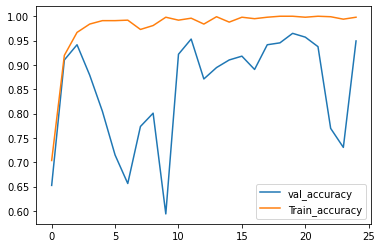

In [29]:
#Visualization of the performace
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.legend(['val_accuracy','Train_accuracy'])

After performing the training using the Transfer Learning models, "ResNet50" gave a generalized model with Training accuracy = 0.9931 and test accuracy =  0.9960